# GAN 평가지표 선행 공부

### Frechet Inception Distance(FID)

- FID는 생성된 이미지의 분포와 원래 이미지의 분포가 얼마나 비슷한지 측정한다.
    하지만, 이미지는 고차원이므로 간단하게 분포의 거리를 측정하는 것은 매우 어렵다.
    그래서 인간의 능력을 초월한 이미지 인식 정밀도르 가진 모델을 사용하여 이미지를 
    저차원으로 변경하고, 그 뒤에 공간에서 분포의 거리를 구하는 것이 FID의 컨셉이다.

- $FID\left(x,\ g\right)=\left|\left|{\mu _x}-\mu _g\right|\right|_2^2+Tr\left(\Sigma _x+\Sigma _g-2\left(\Sigma _x\Sigma _g\right)^{\frac{1}{2}}\right)$FID(x, g)=||μx​−μg​||
2
2​+Tr(Σx​+Σg​−2(Σx​Σg​)
1
2​)​

위와 같은 식에서 inception V3라는 네트워크로 저차원의 벡트의 Wasserstein-2 거리를 계산한다. 각각의 매립된 광간상의 평균 벡터, 공분산행렬이며 첨자로 붙은 g는 생성 이미지, 첨자가 붙지 않은 것은 실제 이미지이다. 위의 계산식은 분산의 거리를 의미하는 것으로, 값이 작을 수록 실제 이미지에 가까운 가짜 이미지가 만들어졌다고 볼 수 있다.

즉, 값이 작아야 Genrator 성능이 좋아짐을 의미한다.

### Inception Score(IS)

- IS는 GAN의 성능평가에 두 가지 기준을 사용한다.
     첫번째로는 생성된 영상의 품질이며 두번째는 생성된 영상의 다양성이다.
IS는 Inception모델에서 식별하기 쉬운 영상 및 식별된 레이블의 편차가 풍부할 수록 score가 높에 출력되며 이 score는 엔트로피 계산을 통해 추출된다. entrpy는 무작위성으로써 랜덤 변수 x의 값이 예측가능하면 엔트로피가 낮게 나오고 예측하기 어렵다면 엔트로피가 높게 나온다. 즉 GAN에서, 조건부 확률 P(y|x)가 매우 예측가능해서 엔트로피가 낮게 나와야한다. 즉, 이는 이미지의 질을 반영하는 것이다.


- KL-divergence(쿨백 라이블러 발산)를 사용해서 IS를 계산

- KL-divergence는 두 데이터 분포가 얼마나 다른지 수치적으로 표현 가능
    두 확률 분포의 다름의 정도를 설명
    기계학습에서는 확인되지 않은 모델을 특정한 확률분포로 근사화 하는데 사용

- 실제 데이터를 최대한 잘 설명하는 정규분포를 구하기 위해서 KL-Divergence를 가장 낮게 만드는 정규분포를 구하면 된다.

## 이외의 GAN의 평가지표

### Multi-scale structural similarity (MS-SSIM)
1. 인간의 지각적 유사성 판단을 예측함으로써 이미지 유사성을 정량적으로 평가

2. MS-SSIM은 인간 인식에 중요하지 않은 이미지의 측면을 무시하는 지각 유사성 메트릭스의 다중 척도 변형

3. MS-SSIM값은 0.0에서 1.0사이, MS-SSIM의 값이 높을 수 록 지각적으로 더 유사한 이미지에 해당됨.

4. Large-scale mode collaps를 잘 발견할 수 있음

5. Color이나 textur의 작은 loss들을 발견하지 못하는 단점 지님

### Perceptual Path Length(PPL)

1. PPL는 "지각"적으로 즉 우리가 감각적으로 봤을 때 잠재공간 상에 이미지가 부드럽게 변화하고 있는가라는 지표이다. FID와 동일하게 학습이 끝난 모델로 생성된 이미지의 거리를 사용한다. 

2. 물체의 형이 변화하지 않고 같은 물체의 색만 변화하는 것들이 "지각적"으로 최단 거리가 되는 예시이다. 그렇다면 물체의 형이 변화하여 다른 이미지를 경유할 때 마다 "지각적"으로 긴 거리가 되는 것이다.

3. lw=E[1ϵ2d(G(slerp(z1,z2;t)),G(slerp(z1,z2;t+ϵ)))]
-  2개의 잠재공간 z1, z2를 비율 t로 섞은 잠재 변수로 생성한 이미지를 비율 t+ε을 섞어 생성한 잠재 변수로 생성한 이미지의 거리의 기대치가 된다.

4. 잠재변수 z를 스타일 w으로 한 함수, lerp는 선형 보완을 의미하며  t를 섞은 데이터와 t+ε로 섞은 데이터가 "지각적"으로 가까우면 작은 값이 도출된다.


# GAN의 문제점
- Mode Collapsing
- Nash equilibrium
- Non - Convergence

## Mode Collapsing
- 학습하는 과정에서 실제 데이터 분포를 따라가지 못하고, 특정 데이터에 강하게 몰리는 현상이 일어난다. 이로 인해 다양성이 사라지게 되는데 모델은 특성상 loss값만 줄이려고 학습하는 경향이 있기 때문에 전체 데이터의 분포를 차지 못하고 하나의 mode에만 편향된다.

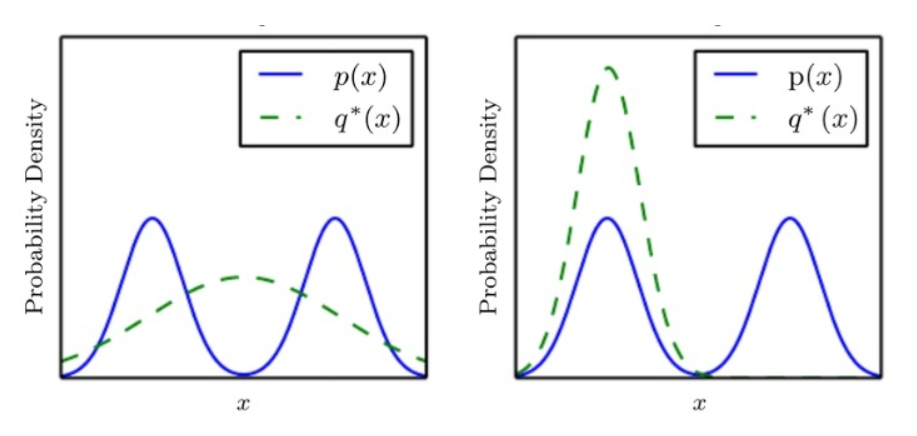
- 파란선이 실제 데이터 분포를 의미하고 생성된 데이터가 초록색 선을 의미하는데 왼쪽 표가 아닌 오른쪽 표의 분포도처럼 특정 데이터값에 치우쳐서 생성한다는 단점이있다,

## Nash equilibrium (힘의 균형)

- 분류기보다 생성기를 학습시키는 것이 일반적으로 어렵다. 생성기가 학습을 잘 못하여 분류기와 생성기 사이의 힘의 균형이 무너지는 경우 GAN학습은 진전될 수 없다. 따라서 EBGAN, Wasserstein GAN과 같이 손실함수를 이용하여 해결하는 시도가 필요하다.

## Non- Convergence(비수렴 - 진동)
- 모델의 매개변수가 진동하고 불안정하여, 수렴하지 않는 현상이 나타난다는 담점이있다.